In [1]:
# Reading the dataset and displaying it
import pandas as pd

df = pd.read_csv('SucideData.csv')

print(df)

                            country  year     sex          age  suicides_no  \
0                           Albania  1987    male  15-24 years         21.0   
1                           Albania  1987    male  35-54 years         16.0   
2                           Albania  1987  female  15-24 years         14.0   
3                           Albania  1987    male    75+ years          1.0   
4                           Albania  1987    male  25-34 years          9.0   
...                             ...   ...     ...          ...          ...   
21788  Saint Vincent and Grenadines  2004    male  55-74 years          1.0   
21789  Saint Vincent and Grenadines  2004    male  35-54 years          2.0   
21790  Saint Vincent and Grenadines  2004    male  25-34 years          1.0   
21791  Saint Vincent and Grenadines  2004  female  15-24 years          0.0   
21792  Saint Vincent and Grenadines  2004     NaN          NaN          NaN   

       population  suicides/100k pop               

In [2]:
print(df.head())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0    312900.0   
1  Albania  1987    male  35-54 years         16.0    308000.0   
2  Albania  1987  female  15-24 years         14.0    289700.0   
3  Albania  1987    male    75+ years          1.0     21800.0   
4  Albania  1987    male  25-34 years          9.0    274300.0   

   suicides/100k pop country-year  HDI for year   gdp_for_year  \
0               6.71  Albania1987           NaN  2,156,624,900   
1               5.19  Albania1987           NaN  2,156,624,900   
2               4.83  Albania1987           NaN  2,156,624,900   
3               4.59  Albania1987           NaN  2,156,624,900   
4               3.28  Albania1987           NaN  2,156,624,900   

   gdp_per_capita       generation  
0           796.0     Generation X  
1           796.0           Silent  
2           796.0     Generation X  
3           796.0  G.I. Generation  
4           796.0    

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21793 entries, 0 to 21792
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            21793 non-null  object 
 1   year               21793 non-null  int64  
 2   sex                21792 non-null  object 
 3   age                21792 non-null  object 
 4   suicides_no        21792 non-null  float64
 5   population         21792 non-null  float64
 6   suicides/100k pop  21792 non-null  float64
 7   country-year       21792 non-null  object 
 8   HDI for year       6468 non-null   float64
 9    gdp_for_year      21792 non-null  object 
 10  gdp_per_capita     21792 non-null  float64
 11  generation         21792 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 2.0+ MB
None


In [4]:
print(df.describe())

               year   suicides_no    population  suicides/100k pop  \
count  21793.000000  21792.000000  2.179200e+04       21792.000000   
mean    2001.110815    219.705993  1.576187e+06          12.453746   
std        8.481499    869.598608  3.173180e+06          18.908068   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1994.000000      2.000000  8.498125e+04           0.760000   
50%     2001.000000     21.000000  3.964000e+05           5.520000   
75%     2008.000000    117.000000  1.302190e+06          16.092500   
max     2016.000000  22338.000000  2.846186e+07         224.970000   

       HDI for year  gdp_per_capita  
count   6468.000000    21792.000000  
mean       0.776221    16570.762757  
std        0.093155    18632.113493  
min        0.483000      251.000000  
25%        0.714000     3501.500000  
50%        0.782000     9467.500000  
75%        0.851000    24172.000000  
max        0.944000   126352.000000  


In [5]:
df.isnull().sum()

country                  0
year                     0
sex                      1
age                      1
suicides_no              1
population               1
suicides/100k pop        1
country-year             1
HDI for year         15325
 gdp_for_year            1
gdp_per_capita           1
generation               1
dtype: int64

In [6]:
df.drop(['HDI for year'], axis=1, inplace=True)

<ipython-input-7-26baddf0c405>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


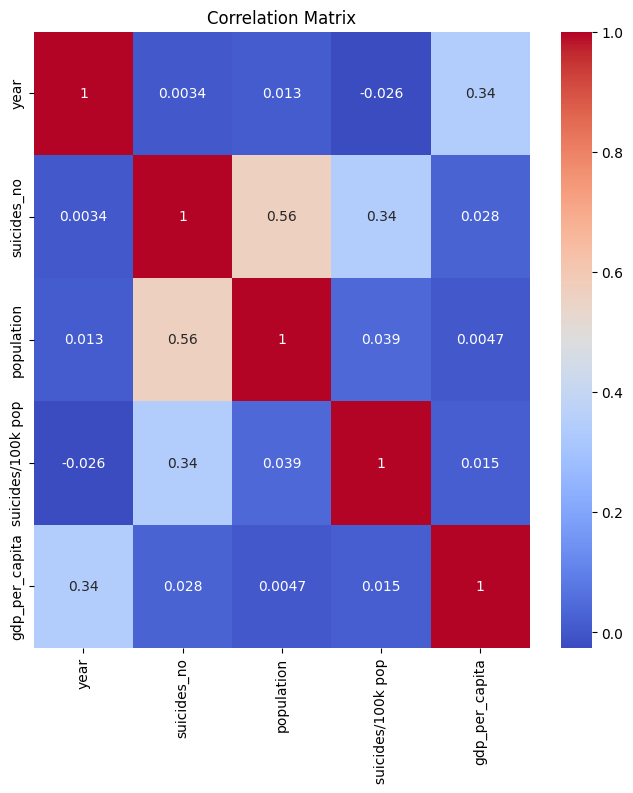

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

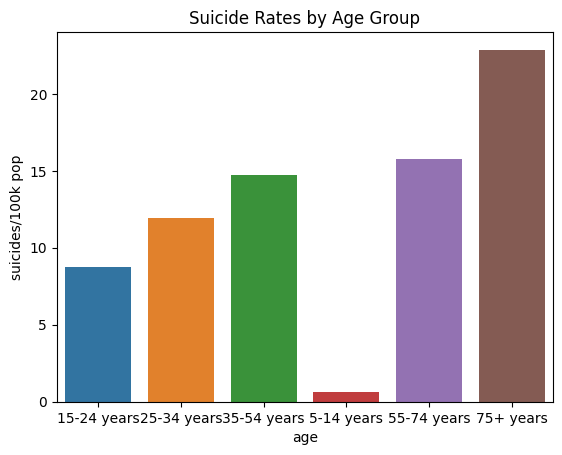

In [8]:
# hypothesis 1: Which age group has highest suicide rates?
# suicide rates by age group

# Finding the average age for each age group
avg_suicide_rates = df.groupby(['age'])['suicides/100k pop'].mean().reset_index()

sns.barplot(data=avg_suicide_rates, x='age', y='suicides/100k pop')
plt.title('Suicide Rates by Age Group')
plt.show()


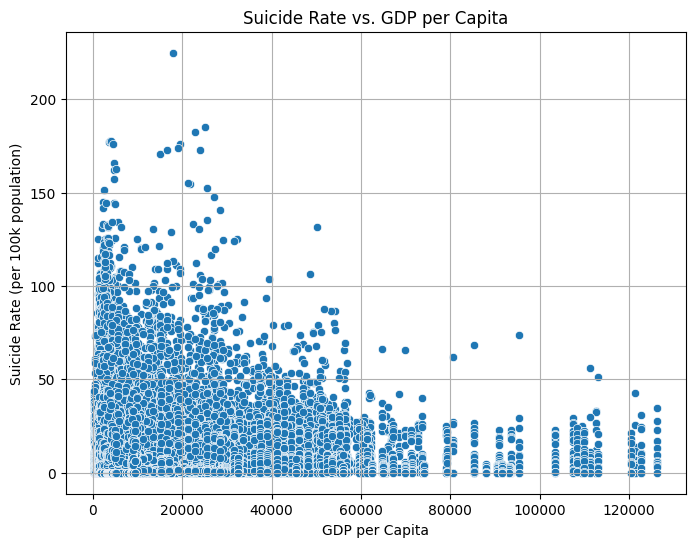

In [10]:
# hypothesis 2: Is there any relation between GDP per capita and suicide/100?
# Scatter plot to visualize the relationship between 'gdp_per_capita' and 'suicides/100k pop'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='gdp_per_capita', y='suicides/100k pop')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Suicide Rate vs. GDP per Capita')
plt.grid()
plt.show()